# Definição do problema

- Referência da base de dados:
    - This Hadi Fanaee-T
    - Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto INESC Porto, Campus da FEUP Rua Dr. Roberto Frias, 378 4200 - 465 Porto, Portugal


# Etapa 1: Importação das bibliotecas

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.15.0'

# Etapa 2: Importação da base de dados

In [ ]:
bike = pd.read_csv('bike-sharing-daily.csv')#Import the base data

In [ ]:
bike

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1    1/1/2011       1   0     1        0        6           0   
1          2    1/2/2011       1   0     1        0        0           0   
2          3    1/3/2011       1   0     1        0        1           1   
3          4    1/4/2011       1   0     1        0        2           1   
4          5    1/5/2011       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  12/27/2012       1   1    12        0        4           1   
727      728  12/28/2012       1   1    12        0        5           1   
728      729  12/29/2012       1   1    12        0        6           0   
729      730  12/30/2012       1   1    12        0        0           0   
730      731  12/31/2012       1   1    12        0        1           1   

     weathersit      temp       hum  windspeed  casual  registered   cnt  
0             2  0.344167  0.805833   0.160446     331         654   985  
1             2  0.363478  0.696087   0.248539     131         670   801  
2             1  0.196364  0.437273   0.248309     120        1229  1349  
3             1  0.200000  0.590435   0.160296     108        1454  1562  
4             1  0.226957  0.436957   0.186900      82        1518  1600  
..          ...       ...       ...        ...     ...         ...   ...  
726           2  0.254167  0.652917   0.350133     247        1867  2114  
727           2  0.253333  0.590000   0.155471     644        2451  3095  
728           2  0.253333  0.752917   0.124383     159        1182  1341  
729           1  0.255833  0.483333   0.350754     364        1432  1796  
730           2  0.215833  0.577500   0.154846     439        2290  2729  

[731 rows x 15 columns]

In [ ]:
bike.head(5)#Show the first five rows

instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp       hum  windspeed  casual  registered   cnt  
0           2  0.344167  0.805833   0.160446     331         654   985  
1           2  0.363478  0.696087   0.248539     131         670   801  
2           1  0.196364  0.437273   0.248309     120        1229  1349  
3           1  0.200000  0.590435   0.160296     108        1454  1562  
4           1  0.226957  0.436957   0.186900      82        1518  1600

In [ ]:
bike.tail(10)#Show the last ten rows

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
721      722  12/22/2012       1   1    12        0        6           0   
722      723  12/23/2012       1   1    12        0        0           0   
723      724  12/24/2012       1   1    12        0        1           1   
724      725  12/25/2012       1   1    12        1        2           0   
725      726  12/26/2012       1   1    12        0        3           1   
726      727  12/27/2012       1   1    12        0        4           1   
727      728  12/28/2012       1   1    12        0        5           1   
728      729  12/29/2012       1   1    12        0        6           0   
729      730  12/30/2012       1   1    12        0        0           0   
730      731  12/31/2012       1   1    12        0        1           1   

     weathersit      temp       hum  windspeed  casual  registered   cnt  
721           1  0.265833  0.441250   0.407346     205        1544  1749  
722           1  0.245833  0.515417   0.133083     408        1379  1787  
723           2  0.231304  0.791304   0.077230     174         746   920  
724           2  0.291304  0.734783   0.168726     440         573  1013  
725           3  0.243333  0.823333   0.316546       9         432   441  
726           2  0.254167  0.652917   0.350133     247        1867  2114  
727           2  0.253333  0.590000   0.155471     644        2451  3095  
728           2  0.253333  0.752917   0.124383     159        1182  1341  
729           1  0.255833  0.483333   0.350754     364        1432  1796  
730           2  0.215833  0.577500   0.154846     439        2290  2729

In [ ]:
bike.info()#Show the last ten element

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


In [ ]:
bike.describe()#Show some describes about the bike dataset

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

# Etapa 3: Limpeza da base de dados

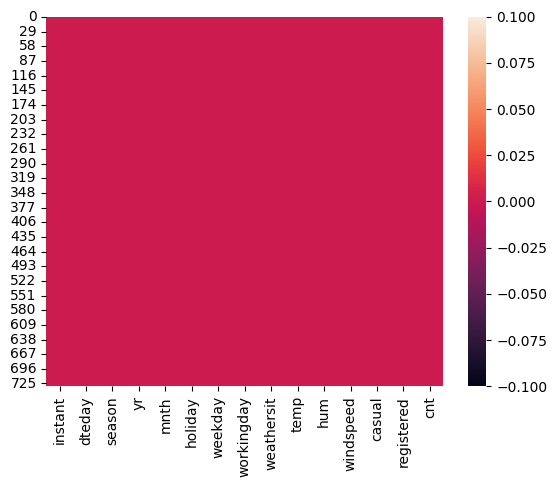

In [ ]:
sns.heatmap(bike.isnull());#Show the heatmap about a null value

In [ ]:
bike = bike.drop(labels=['instant'], axis = 1)#Delete all the column axis with instant as a label

In [ ]:
bike.head()

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0  1/1/2011       1   0     1        0        6           0           2   
1  1/2/2011       1   0     1        0        0           0           2   
2  1/3/2011       1   0     1        0        1           1           1   
3  1/4/2011       1   0     1        0        2           1           1   
4  1/5/2011       1   0     1        0        3           1           1   

       temp       hum  windspeed  casual  registered   cnt  
0  0.344167  0.805833   0.160446     331         654   985  
1  0.363478  0.696087   0.248539     131         670   801  
2  0.196364  0.437273   0.248309     120        1229  1349  
3  0.200000  0.590435   0.160296     108        1454  1562  
4  0.226957  0.436957   0.186900      82        1518  1600

In [ ]:
bike = bike.drop(labels=['casual', 'registered'], axis = 1)#Delete all the column axis with casual and registered as a label

In [ ]:
bike

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0      1/1/2011       1   0     1        0        6           0           2   
1      1/2/2011       1   0     1        0        0           0           2   
2      1/3/2011       1   0     1        0        1           1           1   
3      1/4/2011       1   0     1        0        2           1           1   
4      1/5/2011       1   0     1        0        3           1           1   
..          ...     ...  ..   ...      ...      ...         ...         ...   
726  12/27/2012       1   1    12        0        4           1           2   
727  12/28/2012       1   1    12        0        5           1           2   
728  12/29/2012       1   1    12        0        6           0           2   
729  12/30/2012       1   1    12        0        0           0           1   
730  12/31/2012       1   1    12        0        1           1           2   

         temp       hum  windspeed   cnt  
0    0.344167  0.805833   0.160446   985  
1    0.363478  0.696087   0.248539   801  
2    0.196364  0.437273   0.248309  1349  
3    0.200000  0.590435   0.160296  1562  
4    0.226957  0.436957   0.186900  1600  
..        ...       ...        ...   ...  
726  0.254167  0.652917   0.350133  2114  
727  0.253333  0.590000   0.155471  3095  
728  0.253333  0.752917   0.124383  1341  
729  0.255833  0.483333   0.350754  1796  
730  0.215833  0.577500   0.154846  2729  

[731 rows x 12 columns]

In [ ]:
bike.dteday = pd.to_datetime(bike.dteday, format = '%m/%d/%Y')#Convert the string value to the date format

In [ ]:
bike.head()

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0 2011-01-01       1   0     1        0        6           0           2   
1 2011-01-02       1   0     1        0        0           0           2   
2 2011-01-03       1   0     1        0        1           1           1   
3 2011-01-04       1   0     1        0        2           1           1   
4 2011-01-05       1   0     1        0        3           1           1   

       temp       hum  windspeed  casual  registered   cnt  
0  0.344167  0.805833   0.160446     331         654   985  
1  0.363478  0.696087   0.248539     131         670   801  
2  0.196364  0.437273   0.248309     120        1229  1349  
3  0.200000  0.590435   0.160296     108        1454  1562  
4  0.226957  0.436957   0.186900      82        1518  1600

In [ ]:
bike.index = pd.DatetimeIndex(bike.dteday)#Use the date as a index

In [ ]:
bike.head()

dteday  season  yr  mnth  holiday  weekday  workingday  \
dteday                                                                  
2011-01-01 2011-01-01       1   0     1        0        6           0   
2011-01-02 2011-01-02       1   0     1        0        0           0   
2011-01-03 2011-01-03       1   0     1        0        1           1   
2011-01-04 2011-01-04       1   0     1        0        2           1   
2011-01-05 2011-01-05       1   0     1        0        3           1   

            weathersit      temp       hum  windspeed  casual  registered  \
dteday                                                                      
2011-01-01           2  0.344167  0.805833   0.160446     331         654   
2011-01-02           2  0.363478  0.696087   0.248539     131         670   
2011-01-03           1  0.196364  0.437273   0.248309     120        1229   
2011-01-04           1  0.200000  0.590435   0.160296     108        1454   
2011-01-05           1  0.226957  0.436957   0.186900      82        1518   

             cnt  
dteday            
2011-01-01   985  
2011-01-02   801  
2011-01-03  1349  
2011-01-04  1562  
2011-01-05  1600

In [ ]:
bike = bike.drop(labels=['dteday'], axis=1)#Delete all the column axis with dteday as a label

In [ ]:
bike.head()

season  yr  mnth  holiday  weekday  workingday  weathersit  \
dteday                                                                   
2011-01-01       1   0     1        0        6           0           2   
2011-01-02       1   0     1        0        0           0           2   
2011-01-03       1   0     1        0        1           1           1   
2011-01-04       1   0     1        0        2           1           1   
2011-01-05       1   0     1        0        3           1           1   

                temp       hum  windspeed  casual  registered   cnt  
dteday                                                               
2011-01-01  0.344167  0.805833   0.160446     331         654   985  
2011-01-02  0.363478  0.696087   0.248539     131         670   801  
2011-01-03  0.196364  0.437273   0.248309     120        1229  1349  
2011-01-04  0.200000  0.590435   0.160296     108        1454  1562  
2011-01-05  0.226957  0.436957   0.186900      82        1518  1600

# Etapa 4: Visualização da base de dados

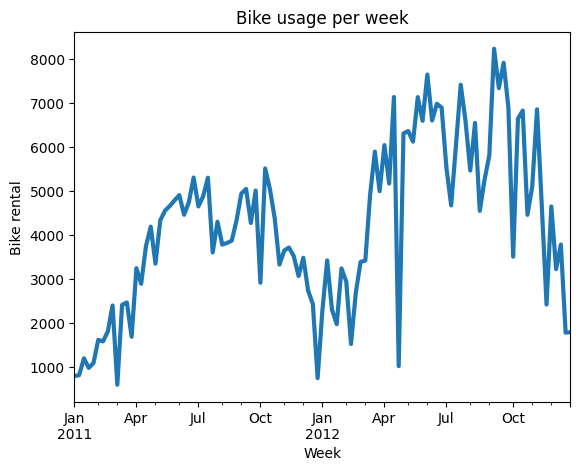

In [ ]:
bike['cnt'].asfreq('W').plot(linewidth = 3)#Show data per week
plt.title('Bike usage per week')
plt.xlabel('Week')
plt.ylabel('Bike rental');

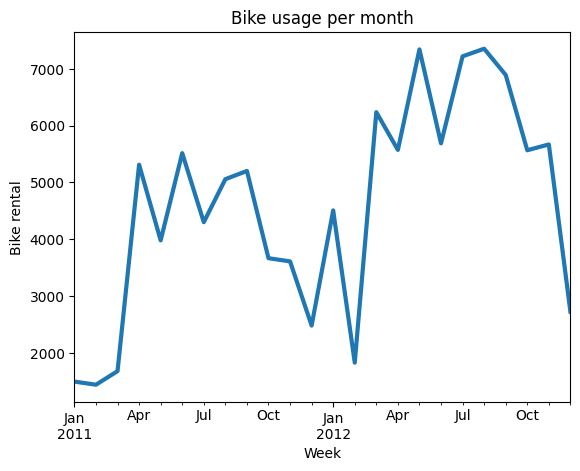

In [ ]:
bike['cnt'].asfreq('M').plot(linewidth = 3)#Show data per month
plt.title('Bike usage per month')
plt.xlabel('Week')
plt.ylabel('Bike rental');

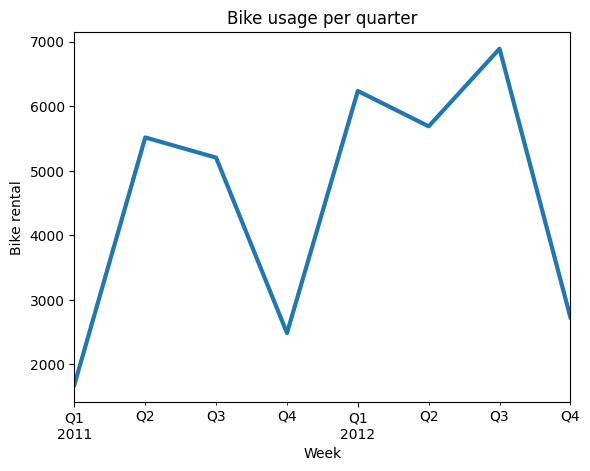

In [ ]:
bike['cnt'].asfreq('Q').plot(linewidth = 3)#Show data per quarter
plt.title('Bike usage per quarter')
plt.xlabel('Week')
plt.ylabel('Bike rental');

In [ ]:
sns.pairplot(bike);

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7f8437d46050> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f8437d452d0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
X_numerical = bike[['temp', 'hum', 'windspeed', 'cnt']]#Select just the numerical values to the X_numerical variable

In [ ]:
X_numerical

temp       hum  windspeed   cnt
dteday                                         
2011-01-01  0.344167  0.805833   0.160446   985
2011-01-02  0.363478  0.696087   0.248539   801
2011-01-03  0.196364  0.437273   0.248309  1349
2011-01-04  0.200000  0.590435   0.160296  1562
2011-01-05  0.226957  0.436957   0.186900  1600
...              ...       ...        ...   ...
2012-12-27  0.254167  0.652917   0.350133  2114
2012-12-28  0.253333  0.590000   0.155471  3095
2012-12-29  0.253333  0.752917   0.124383  1341
2012-12-30  0.255833  0.483333   0.350754  1796
2012-12-31  0.215833  0.577500   0.154846  2729

[731 rows x 4 columns]

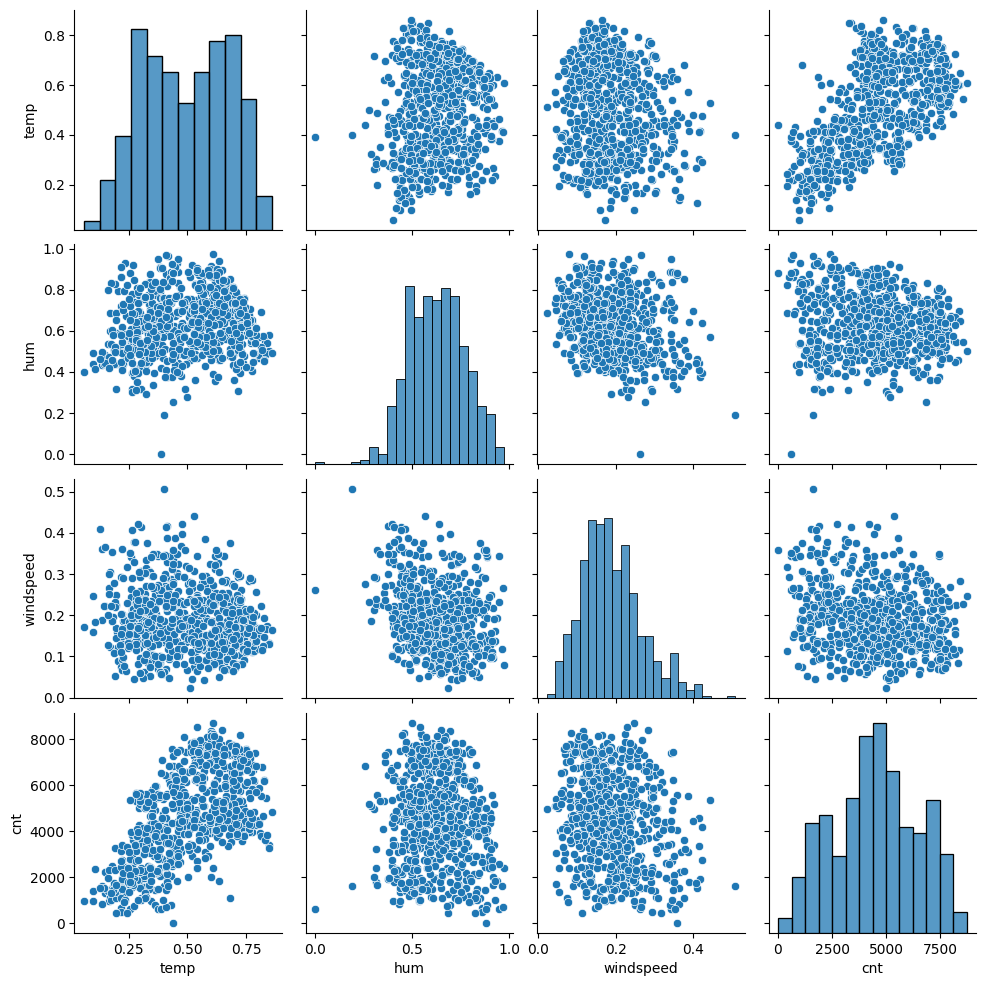

In [ ]:
sns.pairplot(X_numerical)

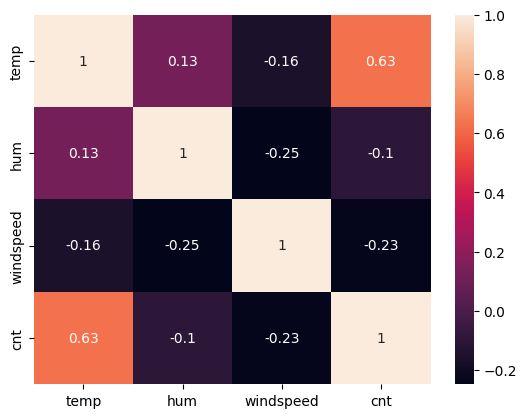

In [ ]:
sns.heatmap(X_numerical.corr(), annot = True);#It is a map that creates a relation between all the labels

# Etapa 5: Tratamento das bases de dados

In [ ]:
X_cat = bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]

In [ ]:
X_cat.head()

season  yr  mnth  holiday  weekday  workingday  weathersit
dteday                                                                
2011-01-01       1   0     1        0        6           0           2
2011-01-02       1   0     1        0        0           0           2
2011-01-03       1   0     1        0        1           1           1
2011-01-04       1   0     1        0        2           1           1
2011-01-05       1   0     1        0        3           1           1

Domingo 0
Segunda 1

Domingo - 0 1 0
Segunda - 1 0 0
Terça   - 0 0 1

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [ ]:
X_cat

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [ ]:
X_cat.shape

(731, 32)

In [ ]:
X_cat = pd.DataFrame(X_cat)

In [ ]:
X_cat.head()

0    1    2    3    4    5    6    7    8    9   ...   22   23   24   25  \
0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0   
4  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0   

    26   27   28   29   30   31  
0  1.0  1.0  0.0  0.0  1.0  0.0  
1  0.0  1.0  0.0  0.0  1.0  0.0  
2  0.0  0.0  1.0  1.0  0.0  0.0  
3  0.0  0.0  1.0  1.0  0.0  0.0  
4  0.0  0.0  1.0  1.0  0.0  0.0  

[5 rows x 32 columns]

In [ ]:
X_numerical.head()

temp       hum  windspeed   cnt
dteday                                         
2011-01-01  0.344167  0.805833   0.160446   985
2011-01-02  0.363478  0.696087   0.248539   801
2011-01-03  0.196364  0.437273   0.248309  1349
2011-01-04  0.200000  0.590435   0.160296  1562
2011-01-05  0.226957  0.436957   0.186900  1600

In [ ]:
X_numerical = X_numerical.reset_index()

In [ ]:
X_numerical.head()

dteday      temp       hum  windspeed   cnt
0 2011-01-01  0.344167  0.805833   0.160446   985
1 2011-01-02  0.363478  0.696087   0.248539   801
2 2011-01-03  0.196364  0.437273   0.248309  1349
3 2011-01-04  0.200000  0.590435   0.160296  1562
4 2011-01-05  0.226957  0.436957   0.186900  1600

In [ ]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)

In [ ]:
X_all.head()

0    1    2    3    4    5    6    7    8    9  ...   27   28   29   30  \
0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  1.0   
1  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  1.0   
2  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  1.0  1.0  0.0   
3  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  1.0  1.0  0.0   
4  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  1.0  1.0  0.0   

    31     dteday      temp       hum  windspeed   cnt  
0  0.0 2011-01-01  0.344167  0.805833   0.160446   985  
1  0.0 2011-01-02  0.363478  0.696087   0.248539   801  
2  0.0 2011-01-03  0.196364  0.437273   0.248309  1349  
3  0.0 2011-01-04  0.200000  0.590435   0.160296  1562  
4  0.0 2011-01-05  0.226957  0.436957   0.186900  1600  

[5 rows x 37 columns]

In [ ]:
X_all = X_all.drop(labels=['dteday'], axis = 1)

In [ ]:
X_all.head()

0    1    2    3    4    5  ...   30   31      temp       hum  windspeed   cnt
0  1.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0  0.344167  0.805833   0.160446   985
1  1.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0  0.363478  0.696087   0.248539   801
2  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.196364  0.437273   0.248309  1349
3  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.200000  0.590435   0.160296  1562
4  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.226957  0.436957   0.186900  1600

[5 rows x 36 columns]

In [ ]:
X = X_all.iloc[:, :-1].values

In [ ]:
y = X_all.iloc[:, -1:].values

In [ ]:
X.shape

(731, 35)

In [ ]:
y.shape

(731, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y)

In [ ]:
y

array([[0.11079153],
       [0.08962264],
       [0.15266912],
       [0.17717441],
       [0.18154625],
       [0.18223654],
       [0.1711919 ],
       [0.10780028],
       [0.09203866],
       [0.14944777],
       [0.14277497],
       [0.13115509],
       [0.15922688],
       [0.1609526 ],
       [0.14104924],
       [0.13598711],
       [0.11251726],
       [0.07604694],
       [0.18729867],
       [0.21916705],
       [0.1749885 ],
       [0.11033134],
       [0.11090658],
       [0.16037736],
       [0.22583985],
       [0.05568339],
       [0.04705476],
       [0.13173033],
       [0.12379199],
       [0.1235619 ],
       [0.17015647],
       [0.15393465],
       [0.17303267],
       [0.17579383],
       [0.19397147],
       [0.1130925 ],
       [0.18419236],
       [0.19443166],
       [0.17349287],
       [0.18212149],
       [0.17441325],
       [0.1983433 ],
       [0.16682006],
       [0.18028072],
       [0.21755637],
       [0.20628164],
       [0.24079613],
       [0.282

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train.shape#Training part

(584, 35)

In [ ]:
X_test.shape#Test part

(147, 35)

# Etapa 6: Construção e treinamento do modelo

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 100, activation='relu', input_shape=(35,)))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               3600      
                                                                 
 dense_17 (Dense)            (None, 100)               10100     
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dense_19 (Dense)            (None, 1)                 101       
                                                                 
Total params: 23901 (93.36 KB)
Trainable params: 23901 (93.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs = 25, batch_size = 50, validation_split=0.2)

Epoch 1/25
5/5 [==============================] - 1s 43ms/step - loss: 0.1608 - val_loss: 0.0624
Epoch 2/25
5/5 [==============================] - 0s 15ms/step - loss: 0.0732 - val_loss: 0.0527
Epoch 3/25
5/5 [==============================] - 0s 11ms/step - loss: 0.0334 - val_loss: 0.0227
Epoch 4/25
5/5 [==============================] - 0s 11ms/step - loss: 0.0266 - val_loss: 0.0219
Epoch 5/25
5/5 [==============================] - 0s 13ms/step - loss: 0.0166 - val_loss: 0.0136
Epoch 6/25
5/5 [==============================] - 0s 14ms/step - loss: 0.0151 - val_loss: 0.0141
Epoch 7/25
5/5 [==============================] - 0s 10ms/step - loss: 0.0116 - val_loss: 0.0127
Epoch 8/25
5/5 [==============================] - 0s 10ms/step - loss: 0.0105 - val_loss: 0.0127
Epoch 9/25
5/5 [==============================] - 0s 10ms/step - loss: 0.0091 - val_loss: 0.0111
Epoch 10/25
5/5 [==============================] - 0s 10ms/step - loss: 0.0086 - val_loss: 0.0108
Epoch 11/25
5/5 [============

# Etapa 7: Avaliação do modelo

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

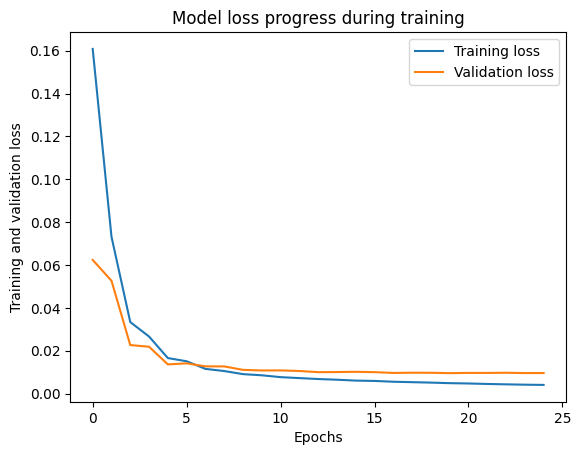

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training and validation loss')
plt.legend(['Training loss', 'Validation loss']);

In [ ]:
y_predict = model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [ ]:
y_predict

array([[0.41694248],
       [0.39298937],
       [0.741073  ],
       [0.5560192 ],
       [0.39002404],
       [0.26348215],
       [0.4337829 ],
       [0.44516632],
       [0.5432561 ],
       [0.5991005 ],
       [0.47135052],
       [0.38546613],
       [0.53819734],
       [0.3729664 ],
       [0.44138655],
       [0.7665629 ],
       [0.61255693],
       [0.88864166],
       [0.38543457],
       [0.50311035],
       [0.5822988 ],
       [0.6931339 ],
       [0.32369784],
       [0.71402836],
       [0.5410445 ],
       [0.75492686],
       [0.56867   ],
       [0.30989084],
       [0.44771683],
       [0.66400355],
       [0.50521237],
       [0.513007  ],
       [0.56414485],
       [0.683533  ],
       [0.86427325],
       [0.69283986],
       [0.20850599],
       [0.27543536],
       [0.5268353 ],
       [0.57128745],
       [0.82877445],
       [0.37270245],
       [0.4219579 ],
       [0.6248642 ],
       [0.7498943 ],
       [0.51728684],
       [0.19467793],
       [0.470

Text(0, 0.5, 'True values')

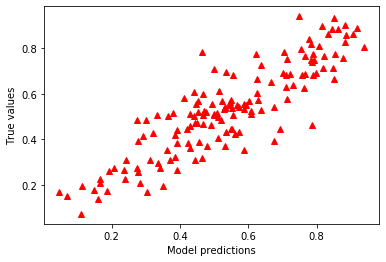

In [ ]:
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model predictions')
plt.ylabel('True values')

In [ ]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

Text(0, 0.5, 'True values')

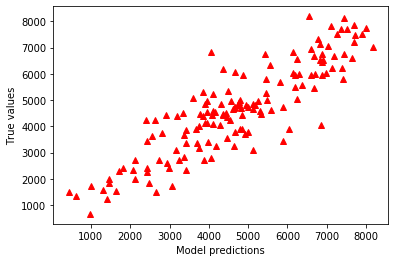

In [ ]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model predictions')
plt.ylabel('True values')

In [ ]:
k = X_test.shape[1]
k

35

In [ ]:
n = len(X_test)
n

147

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [ ]:
mae = mean_absolute_error(y_test_orig, y_predict_orig)
mse = mean_squared_error(y_test_orig, y_predict_orig)
rmse = sqrt(mse)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [ ]:
print("MAE: ", mae, "\nMSE: ", mse, "\nRMSE: ", rmse, "\nR2: ", r2, "\nADJ R2: ", adj_r2)

MAE:  673.7386736188616 
MSE:  763451.0052557684 
RMSE:  873.7568341682761 
R2:  0.7667325042983577 
ADJ R2:  0.6931796903383804
